In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pplt

In [8]:

master= pd.read_csv('master.csv')

In [9]:
bad_countries = ['Dominica',
'Grenada',
'Jamaica',
'Kiribati',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and Grenadines',
'San Marino',
'Seychelles',
'Albania',
'Antigua and Barbuda',
'Armenia',
'Aruba',
'Azerbaijan',
'Bahamas',
'Bahrain',
'Barbados',
'Belize',
'Bulgaria',
'Costa Rica',
'Cyprus',
'Macau',
'Maldives',
'Malta',
'Mongolia',
'Monte Negro',
'Nicaragua',
'Oman']

years = [2016]

In [10]:
master_good = master[~(master['country'].isin(bad_countries)| master['year'].isin(years))] 
master_good

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


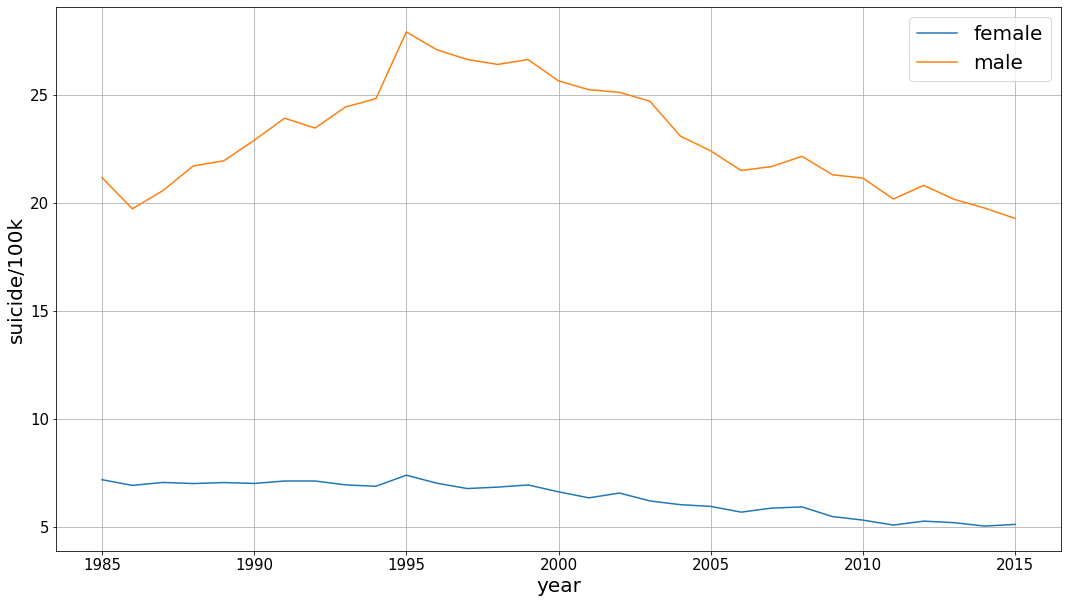

In [15]:
#Plotting the global rates for female vs male
pplt.rcParams["figure.figsize"] = (18,10)

master_good.groupby(['year','sex'])['suicides/100k pop'].mean().unstack().plot()

pplt.legend(loc='upper right', fontsize=20)
pplt.xticks(fontsize=15)
pplt.yticks(fontsize=15)
pplt.xlabel('year',fontsize=20)
pplt.ylabel('suicide/100k',fontsize=20)
pplt.grid()

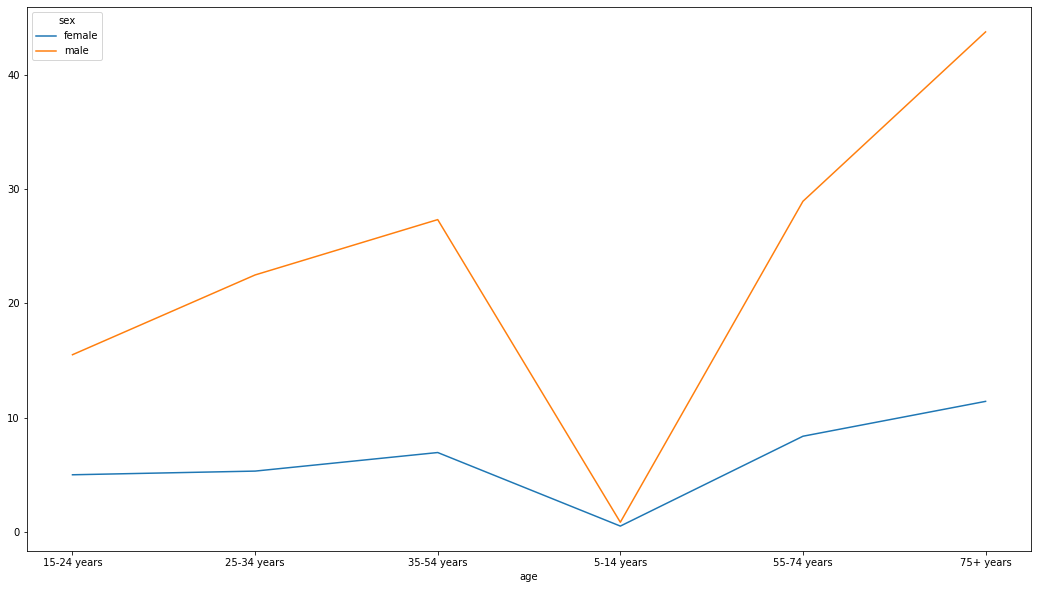

In [17]:
#Plotting male vs female for all age groups

master_good.groupby(['age','sex'])['suicides/100k pop'].mean().unstack().plot()

In [32]:
#Function to convert the age column into integers based on mean of the range

def age_to_int(df):
    if df['age'] == '75+ years':
        age = 75
    elif df['age'] == '55-74 years':
        age=65
    elif df['age']=='35-54 years':
        age=45
    elif df['age']=='25-34 years':
        age=30
    elif df['age']=='15-24 years':
        age=20
    elif df['age']=='5-14 years':
        age=10
    return age

In [33]:
#Add new column with the converted age

master_good['age_int']=master_good.apply(age_to_int, axis=1)

/home/pjammu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,age_int
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,75
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,65
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent,45
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation,65
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,45
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,75
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,10
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,10


Text(0, 0.5, 'suicide/100k')

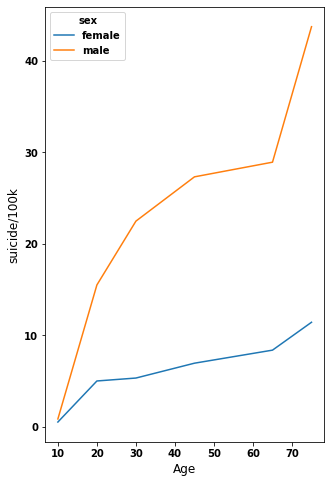

In [94]:
#Plot male vs female based on the age_int column
master_good_grouped = master_good.groupby(['age_int','sex'])['suicides/100k pop'].mean().unstack()

master_good_grouped.plot()
pplt.xlabel('Age', fontsize=12)
pplt.ylabel('suicide/100k',fontsize=12)

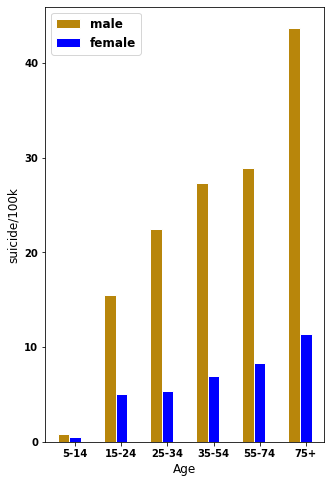

In [92]:
#Plotting a bar plot of male vs female suicide rates

from matplotlib import rc
pplt.rcParams["figure.figsize"] = (5,8)

rc('font')
barWidth=0.25
male=master_good_grouped['male'].tolist()
female=master_good_grouped['female'].tolist()

r=np.arange(len(male))
r2=[x + barWidth for x in r]

names=['5-14','15-24','25-34', '35-54', '55-74', '75+']


pplt.bar(r, male, color='darkgoldenrod', edgecolor='white', width=barWidth, label='male')
pplt.bar(r2, female, color='blue', edgecolor='white', width=barWidth, label='female')

pplt.xticks([r + barWidth for r in range(len(male))], names)

pplt.xlabel('Age',fontsize=12)
pplt.ylabel('suicide/100k',fontsize=12)
pplt.legend(fontsize=12)
pplt.show()

In [11]:
master_good.groupby(['generation']).mean()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
generation,,,,,,
Boomers,2000.004020,569.203266,3.299892e+06,16.913575,0.783199,17722.257286
G.I. Generation,1992.133090,228.814038,9.561384e+05,27.433437,0.732273,11712.667274
Generation X,1999.587568,296.552580,2.585496e+06,12.034056,0.776832,17283.211884
Generation Z,2010.846801,13.228114,2.079228e+06,0.697492,0.813199,28432.437710
Millenials,2004.652324,132.430293,2.245135e+06,6.091921,0.801729,20998.927711
Silent,2002.384828,348.347294,1.795134e+06,21.339949,0.788052,19450.228368


In [12]:
master_good.groupby(['country','sex']).mean()

year  suicides_no    population  \
country       sex                                              
Argentina     female  2000.000000    98.526882  2.848001e+06   
              male    2000.000000   343.510753  2.721813e+06   
Australia     female  1999.833333    85.144444  1.517186e+06   
              male    1999.833333   304.361111  1.496024e+06   
Austria       female  2000.000000    69.354839  6.584874e+05   
...                           ...          ...           ...   
United States male    2000.000000  4409.763441  2.118456e+07   
Uruguay       female  2000.214286    16.785714  2.589430e+05   
              male    2000.214286    61.416667  2.414674e+05   
Uzbekistan    female  2001.318182    70.151515  1.860164e+06   
              male    2001.318182   193.507576  1.824855e+06   

                      suicides/100k pop  HDI for year  gdp_per_capita ($)  
country       sex                                                          
Argentina     female           3.795968      0.779600         7914.096774  
              male            17.142688      0.779600         7914.096774  
Australia     female           5.314444      0.912750        32776.400000  
              male            20.671167      0.912750        32776.400000  
Austria       female          10.398118      0.847500        33920.000000  
...                                 ...           ...                 ...  
United States male            22.963226      0.891600        39269.612903  
Uruguay       female           6.513333      0.746556         7622.071429  
              male            32.409048      0.746556         7622.071429  
Uzbekistan    female           4.336212      0.650000          976.181818  
              male            11.862045      0.650000          976.181818  

[148 rows x 6 columns]

In [13]:
master_good.groupby(['year','sex']).mean()

suicides_no    population  suicides/100k pop  HDI for year  \
year sex                                                                  
1985 female   148.310185  2.342275e+06           7.169259      0.702258   
     male     381.500000  2.261739e+06          21.168056      0.702258   
1986 female   146.504386  2.269909e+06           6.905614           NaN   
     male     375.916667  2.186929e+06          19.721711           NaN   
1987 female   140.333333  2.238228e+06           7.041870           NaN   
...                  ...           ...                ...           ...   
2013 male     437.097436  2.340474e+06          20.159436      0.819484   
2014 female   133.395833  2.512662e+06           5.019375      0.818885   
     male     443.393229  2.397905e+06          19.756328      0.818885   
2015 female   148.179245  2.838210e+06           5.097358           NaN   
     male     490.625786  2.710482e+06          19.275503           NaN   

             gdp_per_capita ($)  
year sex                         
1985 female         6781.666667  
     male           6781.666667  
1986 female         8166.500000  
     male           8166.500000  
1987 female        10031.170732  
...                         ...  
2013 male          31199.615385  
2014 female        30384.765625  
     male          30384.765625  
2015 female        28595.905660  
     male          28595.905660  

[62 rows x 5 columns]

In [14]:
master_good.groupby(['sex','generation']).mean()

year  suicides_no    population  \
sex    generation                                                
female Boomers          2000.004020   229.649749  3.354975e+06   
       G.I. Generation  1992.133090   158.606199  1.146643e+06   
       Generation X     1999.587568   119.817826  2.567823e+06   
       Generation Z     2010.846801    10.190236  2.031180e+06   
       Millenials       2004.652324    56.745697  2.202394e+06   
       Silent           2002.384828   184.542868  1.977261e+06   
male   Boomers          2000.004020   908.756784  3.244810e+06   
       G.I. Generation  1992.133090   299.021878  7.656335e+05   
       Generation X     1999.587568   473.287334  2.603170e+06   
       Generation Z     2010.846801    16.265993  2.127276e+06   
       Millenials       2004.652324   208.114888  2.287875e+06   
       Silent           2002.384828   512.151719  1.613008e+06   

                        suicides/100k pop  HDI for year  gdp_per_capita ($)  
sex    generation                                                            
female Boomers                   6.797789      0.783199        17722.257286  
       G.I. Generation          12.508778      0.732273        11712.667274  
       Generation X              4.947760      0.776832        17283.211884  
       Generation Z              0.587929      0.813199        28432.437710  
       Millenials                2.880947      0.801729        20998.927711  
       Silent                    8.902343      0.788052        19450.228368  
male   Boomers                  27.029362      0.783199        17722.257286  
       G.I. Generation          42.358095      0.732273        11712.667274  
       Generation X             19.120352      0.776832        17283.211884  
       Generation Z              0.807054      0.813199        28432.437710  
       Millenials                9.302896      0.801729        20998.927711  
       Silent                   33.777554      0.788052        19450.228368

In [15]:
master_good.groupby(['sex','age']).mean()

year  suicides_no    population  suicides/100k pop  \
sex    age                                                                     
female 15-24 years  2001.22715    93.844781  2.254768e+06           5.000919   
       25-34 years  2001.22715   111.958897  2.226633e+06           5.322342   
       35-54 years  2001.22715   271.442401  3.864195e+06           6.946755   
       5-14 years   2001.22715     9.061655  2.185687e+06           0.510043   
       55-74 years  2001.22715   229.603029  2.529683e+06           8.373835   
       75+ years    2001.22715   118.321796  9.098772e+05          11.424516   
male   15-24 years  2001.22715   339.386696  2.335588e+06          15.506598   
       25-34 years  2001.22715   490.789616  2.256312e+06          22.487593   
       35-54 years  2001.22715  1043.116820  3.779508e+06          27.330541   
       5-14 years   2001.22715    18.826393  2.282607e+06           0.846560   
       55-74 years  2001.22715   656.461871  2.150968e+06          28.934208   
       75+ years    2001.22715   229.514332  5.098504e+05          43.756279   

                    HDI for year  gdp_per_capita ($)  
sex    age                                            
female 15-24 years      0.785884        18680.858843  
       25-34 years      0.785884        18680.858843  
       35-54 years      0.785884        18680.858843  
       5-14 years       0.785884        18680.858843  
       55-74 years      0.785884        18680.858843  
       75+ years        0.785884        18680.858843  
male   15-24 years      0.785884        18680.858843  
       25-34 years      0.785884        18680.858843  
       35-54 years      0.785884        18680.858843  
       5-14 years       0.785884        18680.858843  
       55-74 years      0.785884        18680.858843  
       75+ years        0.785884        18680.858843

In [16]:
master_good.groupby(['sex']).mean()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
sex,,,,,,
female,2001.22715,139.038760,2.328474e+06,6.263068,0.785884,18680.858843
male,2001.22715,463.015955,2.219139e+06,23.143630,0.785884,18680.858843
